# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Ethereum bulls chase $2,200 ahead of Friday’s $230M ETH options expiry.  A $2,200 Ethereum price would give bulls a $28 million advantage in this week’s ETH options expiry, but traders are more focused on the impact of the London hard fork in mid-July.  ... [| Skaityti daugiau](https://cointelegraph.com/news/ethereum-bulls-chase-2-200-ahead-of-friday-s-230m-eth-options-expiry) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- J&J Covid-19 Vaccine Shows Promising Preliminary Signs of Protecting Against Delta Variant.  The vaccine triggered the production of antibodies that can neutralize the variant in laboratory testing of eight blood samples, the company said ... [| Skaityti daugiau](https://www.wsj.com/articles/j-j-covid-19-vaccine-shows-promising-preliminary-signs-of-protecting-against-delta-variant-11625184011?mod=hp_lead_pos6) 

### Kainų kaita pandemijos metu

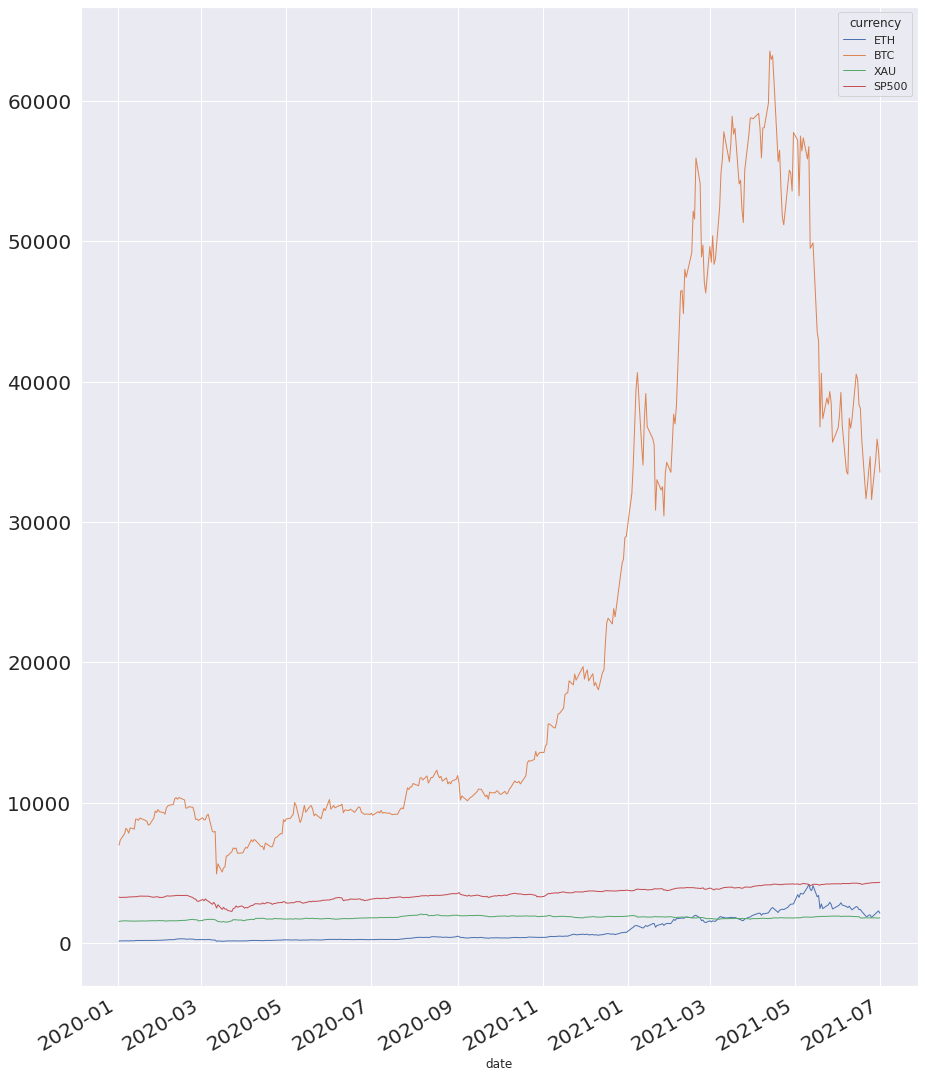

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.893333,0.206289,0.848797
BTC,0.893333,1.000000,0.139044,0.836978
XAU,0.206289,0.139044,1.000000,0.398191
SP500,0.848797,0.836978,0.398191,1.000000


In [8]:
#hide ### Koreliacijos matrica.

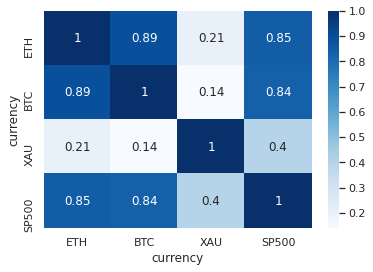

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')